<a href="https://colab.research.google.com/github/Rick-Rice/DATA110/blob/main/Beta_HL_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Beta for HL vs PHYS

In [1]:
# Load Hecla Mining data from finance.yahoo.com

import pandas as pd
import yfinance as yf

df = yf.download('HL', start='2024-02-29', end='2024-05-07')
# df = yf.download('WPM', start='2024-02-29', end='2024-04-11')

# df = pd.read_csv('/content/WPM.csv')

df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-29,3.52,3.62,3.51,3.54,3.534768,6631700
2024-03-01,3.58,3.73,3.51,3.71,3.704517,7467600
2024-03-04,3.80,3.94,3.78,3.91,3.904222,8783800
2024-03-05,3.94,3.99,3.80,3.82,3.814355,9585200
2024-03-06,3.91,3.99,3.90,3.95,3.944163,8656100


In [2]:
# Load Sprott Physical Gold Trust (PHYS) data from finance.yahoo.com

# dfm = yf.download('PHYS', start='2024-02-29', end='2024-04-11')

dfm = yf.download('PHYS', start='2024-02-29', end='2024-05-07')

# dfm = pd.read_csv('/content/PHYS.csv')

dfm.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-29,15.780000,15.820000,15.72,15.790000,15.790000,2565300
2024-03-01,15.900000,16.170000,15.81,16.129999,16.129999,5406500
2024-03-04,16.280001,16.450001,16.23,16.400000,16.400000,4687000
2024-03-05,16.549999,16.600000,16.48,16.530001,16.530001,3396100
2024-03-06,16.639999,16.730000,16.57,16.680000,16.680000,2409300


In [3]:
# Load S&P 500 data from finance.yahoo.com

# dfspx = yf.download('^SPX', start='2024-02-29', end='2024-04-11')

dfspx = yf.download('^SPX', start='2024-02-29', end='2024-05-07')

# dfspx = pd.read_csv('/content/SPX.csv')

dfspx.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-29,5085.359863,5104.990234,5061.890137,5096.270020,5096.270020,5219740000
2024-03-01,5098.509766,5140.330078,5094.160156,5137.080078,5137.080078,4748110000
2024-03-04,5130.990234,5149.669922,5127.180176,5130.950195,5130.950195,4758440000
2024-03-05,5110.520020,5114.540039,5056.819824,5078.649902,5078.649902,4418410000
2024-03-06,5108.029785,5127.970215,5092.220215,5104.759766,5104.759766,4559050000


## Calculate daily returns

In [4]:
# For Hecla (HL)

import numpy as np

Returns = np.zeros(len(df))

for i in range(1,len(df)):

  Returns[i] = df['Adj Close'][i] / df['Adj Close'][i-1] - 1


In [5]:
# For gold market (PHYS)

ReturnsM = np.zeros(len(dfm))

for i in range(1,len(dfm)):

  ReturnsM[i] = dfm['Adj Close'][i] / dfm['Adj Close'][i-1] - 1


In [6]:
# For S&P 500

ReturnsSPX = np.zeros(len(dfspx))

for i in range(1,len(dfspx)):

  ReturnsSPX[i] = dfspx['Adj Close'][i] / dfspx['Adj Close'][i-1] - 1

In [7]:
ReturnsSPX[0:10]

array([ 0.        ,  0.00800783, -0.00119326, -0.0101931 ,  0.0051411 ,
        0.01030413, -0.00652852, -0.00112224,  0.01120179, -0.00192453])

In [8]:
Returns[0:10]

array([ 0.        ,  0.04802267,  0.05390835, -0.02301793,  0.03403143,
        0.04556962, -0.01694919,  0.06314752, -0.01856147,  0.0496454 ])

## Calculate covariance and beta

In [9]:

# Set date range for WPM and PHYS

# I = 4695
# M = 3526

I = 1
M = 1

# I_end = 4723
# M_end = 3554

I_end = len(df)
M_end = len(dfm)

print( ' WPM  ',df.index[I], df.index[I_end-1])
print( ' PHYS ',dfm.index[M], dfm.index[M_end-1])

# Get Variance - Covariance Matrix

cov_hl = np.cov(Returns[I:I_end],ReturnsM[M:M_end])

print('Variance / Covariance Matrix \n\n',cov_hl, '\n')

# Calculate Beta as COV(i,m) / Var(m)

Beta = cov_hl[0][1]/cov_hl[1][1]

print('Beta: ',Beta)

# April 11  Beta:  1.4726689769297276


 WPM   2024-03-01 00:00:00 2024-05-06 00:00:00
 PHYS  2024-03-01 00:00:00 2024-05-06 00:00:00
Variance / Covariance Matrix 

 [[0.00117922 0.00021279]
 [0.00021279 0.00010224]] 

Beta:  2.081377493875858


In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,47.000000,47.000000,47.000000,47.000000,47.000000,4.700000e+01
mean,4.722766,4.853191,4.625745,4.738723,4.737871,9.314860e+06
std,0.595741,0.599533,0.557127,0.573959,0.575259,3.476836e+06
min,3.520000,3.620000,3.510000,3.540000,3.534768,3.895100e+06
25%,4.250000,4.415000,4.225000,4.270000,4.270000,6.928650e+06
50%,4.830000,4.950000,4.720000,4.770000,4.770000,8.743300e+06
75%,5.190000,5.355000,5.130000,5.270000,5.270000,1.055665e+07
max,5.790000,5.900000,5.550000,5.590000,5.590000,2.196160e+07


## Calculate R-squared and p values

In [11]:

import statsmodels.api as sm

y = Returns[I:I_end]
x = ReturnsM[M:M_end]

Y = Returns[I:I_end]

X = ReturnsM[M:M_end]

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

predictions = model.predict(X)

summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     26.47
Date:                Thu, 09 May 2024   Prob (F-statistic):           5.97e-06
Time:                        20:27:55   Log-Likelihood:                 101.15
No. Observations:                  46   AIC:                            -198.3
Df Residuals:                      44   BIC:                            -194.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.004      0.504      0.6

In [12]:
b = model.params[0]      # Intercept

print(model.params, b)

[0.00212076 2.08137749] 0.0021207607714577386


## Plot regression line (with beta slope)

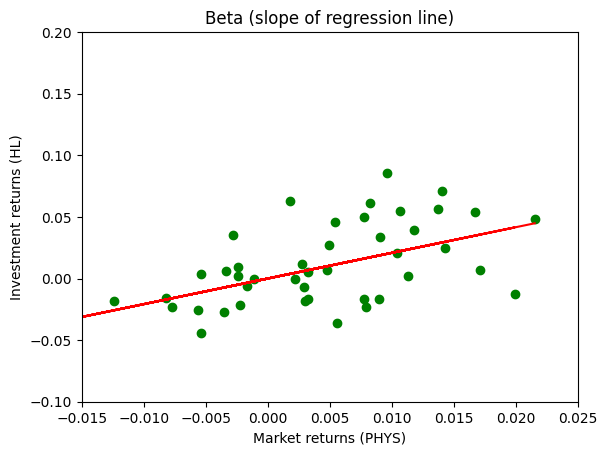

In [13]:
import matplotlib.pyplot as plt

plt.scatter(x, y, c ='green')

plt.plot(x,Beta*x,b,c='red')

plt.title("Beta (slope of regression line)")
plt.xlabel("Market returns (PHYS)")
plt.ylabel("Investment returns (HL)")

plt.xlim(-0.015,0.025)
plt.ylim(-0.10,0.20)

plt.show()

## Set up for Beta Predictions Plot

In [14]:
# Create predictions dataframe pf

pd.options.mode.chained_assignment = None

# del pf

pf = pd.DataFrame(columns=['Date','Gold_Returns','predicted_returns_hl','predicted_price_hl',#
                                  'SP_Returns','predicted_returns_HLxSP','predicted_price_HLxSP','actual_price_hl'])


In [15]:
# Confirm date alignment

I_end = len(df)
M_end = len(dfm)

print(df.index[I],df.index[I_end-1])
print(dfm.index[M],dfm.index[M_end-1])

S = 1
S_end = len(dfspx)

print(dfspx.index[S],dfspx.index[S_end-1])


2024-03-01 00:00:00 2024-05-06 00:00:00
2024-03-01 00:00:00 2024-05-06 00:00:00
2024-03-01 00:00:00 2024-05-06 00:00:00


In [16]:

pf.Date = df.index[I:I_end]

# pf.actual_price_hl = df['Adj Close'][I:I_end]

for i in range(I,I_end):
   pf.actual_price_hl[i-1] = df['Adj Close'][i]


In [17]:
pf.Gold_Returns    = ReturnsM[M:M_end]

pf.predicted_returns_hl = Beta * pf.Gold_Returns

In [18]:
pf.predicted_price_hl.iloc[0] = pf.actual_price_hl.iloc[0]

for j in range(1,len(pf)):

  pf.predicted_price_hl.iloc[j] = pf.predicted_price_hl.iloc[j-1] * (1+pf.predicted_returns_hl.iloc[j])


In [19]:
pf.SP_Returns = ReturnsSPX[S:S_end]


In [20]:
# SPX_Beta = 0.66        # WPM - Copied from finance.yahoo.com

SPX_Beta = 2.23         # HL - Copied from finance.yahoo.com

pf.predicted_returns_HLxSP = SPX_Beta * pf.SP_Returns

In [21]:
pf.predicted_price_HLxSP.iloc[0] = pf.actual_price_hl.iloc[0]

for j in range(1,len(pf)):

  pf.predicted_price_HLxSP.iloc[j] = pf.predicted_price_HLxSP.iloc[j-1] * (1+pf.predicted_returns_HLxSP.iloc[j])


In [22]:
pf.head()

,Date,Gold_Returns,predicted_returns_hl,predicted_price_hl,SP_Returns,predicted_returns_HLxSP,predicted_price_HLxSP,actual_price_hl
0,2024-03-01,0.021533,0.044817,3.704517,0.008008,0.017857,3.704517,3.704517
1,2024-03-04,0.016739,0.034840,3.833584,-0.001193,-0.002661,3.69466,3.904222
2,2024-03-05,0.007927,0.016499,3.896833,-0.010193,-0.022731,3.610678,3.814355
3,2024-03-06,0.009074,0.018887,3.970434,0.005141,0.011465,3.652073,3.944163
4,2024-03-07,0.005396,0.011230,4.015024,0.010304,0.022978,3.735991,4.123897


In [23]:
pf.columns[[0,3,-2,-1]]

Index(['Date', 'predicted_price_hl', 'predicted_price_HLxSP',
       'actual_price_hl'],
      dtype='object')

In [24]:

pf2 = pf[ pf.columns[[0,3,-2,-1]] ]

pf2 = pf2.rename( columns = {'predicted_price_hl' : 'price predicted by Gold',
                             'predicted_price_HLxSP':'price predicted by S&P',
                             'actual_price_hl'  :  'actual stock price'  } )


pf2.head()



,Date,price predicted by Gold,price predicted by S&P,actual stock price
0,2024-03-01,3.704517,3.704517,3.704517
1,2024-03-04,3.833584,3.69466,3.904222
2,2024-03-05,3.896833,3.610678,3.814355
3,2024-03-06,3.970434,3.652073,3.944163
4,2024-03-07,4.015024,3.735991,4.123897


In [25]:
pf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     46 non-null     datetime64[ns]
 1   price predicted by Gold  46 non-null     object        
 2   price predicted by S&P   46 non-null     object        
 3   actual stock price       46 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.6+ KB


In [26]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     46 non-null     datetime64[ns]
 1   Gold_Returns             46 non-null     float64       
 2   predicted_returns_hl     46 non-null     float64       
 3   predicted_price_hl       46 non-null     object        
 4   SP_Returns               46 non-null     float64       
 5   predicted_returns_HLxSP  46 non-null     float64       
 6   predicted_price_HLxSP    46 non-null     object        
 7   actual_price_hl          46 non-null     object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 3.0+ KB


(0.0, 5.698050557527612)

<Figure size 2000x1000 with 0 Axes>

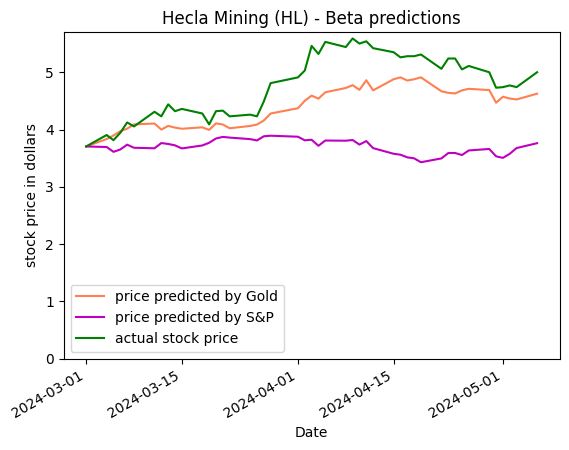

In [27]:

plt.figure(figsize=(20,10))

pf2.plot(x='Date',color=['coral','m','green'],title='Hecla Mining (HL) - Beta predictions',
         ylabel='stock price in dollars')

plt.ylim(bottom=0)

